# Kaggle: Titanic Machine Learning

Machine Learning Workflow:

1. Data cleaning
2. Exploratory Data Analysis
3. Data Formatting
4. Feature engineering
5. Compare several machine learning models on a performance metric
6. Feature selection
7. Perform hyperparameter tuning on the best model
8. Evaluate the best model on the testing set

# 1. Data cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('~/Python/kaggletitanic/data/train.csv')
test = pd.read_csv('~/Python/kaggletitanic/data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 2. EDA:

In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Parrish, Mrs. (Lutie Davis)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Target Variable: Survived
0 = Died, 1 = Survived

In [8]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

- about 62% died, 38% survived

([<matplotlib.axis.XTick at 0x115585dd8>,
 <a list of 2 Text xticklabel objects>)

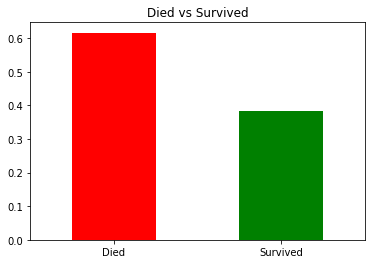

In [9]:
train['Survived'].value_counts(normalize=True).plot(kind='bar', color=['red', 'green'])
plt.title('Died vs Survived')
plt.xticks((0, 1), ['Died', 'Survived'], rotation=0)

### PassengerId:
- seems like just an index, so we won't use it for our machine learning model

### Pclass (categorical):
1 = 1st class, 2 = 2nd class, 3 = 3rd class

In [10]:
train['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [11]:
train.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

survival rate increases as you move up classes:
- 1st class = 63% survived, 37% died
- 2nd class = 47% survived, 53% died
- 3rd class = 24% survived, 76% died

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

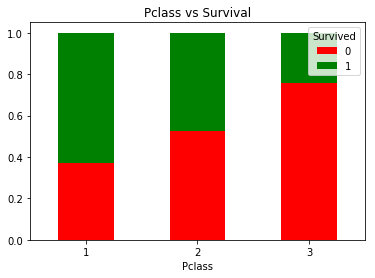

In [12]:
train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Pclass vs Survival')
plt.xticks(rotation=0)

### Name:
- name of the passenger
- has useful information like title (Mr, Mrs, Master...)
- **could possibly extract information like passenger importance for feature engineering**

### Sex (categorical):

In [13]:
train.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

females have much higher survival rate
- male = 19% survived, 81% died
- female = 74% survived, 26% died

(array([0, 1]), <a list of 2 Text xticklabel objects>)

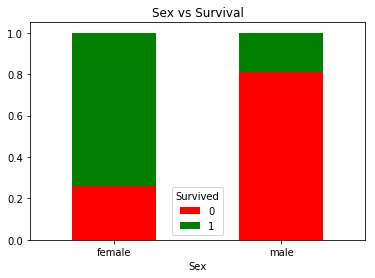

In [14]:
train.groupby('Sex')['Survived'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Sex vs Survival')
plt.xticks(rotation=0)

### Age (continuous):

In [15]:
train[train['Survived'] == 0]['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

mean age of died = 30.6

Text(0.5,0,'Age')

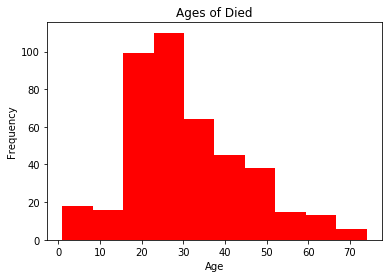

In [16]:
train[train['Survived'] == 0]['Age'].plot(kind='hist', color='red')
plt.title('Ages of Died')
plt.xlabel('Age')

In [17]:
train[train['Survived'] == 1]['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

mean age of survived = 28.3

Text(0.5,0,'Age')

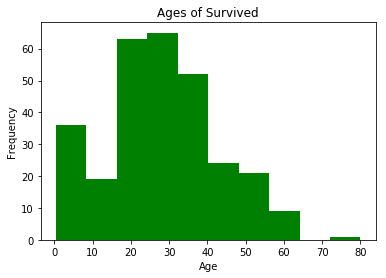

In [18]:
train[train['Survived'] == 1]['Age'].plot(kind='hist', color='green')
plt.title('Ages of Survived')
plt.xlabel('Age')

distrubition bi-modal at ages 0-10 supports "women and children first"

### SibSp (continuous):
- number of siblings and/or spouses passenger had aboard
- low number of unique values (8) so we can treat as categorical

In [19]:
train['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

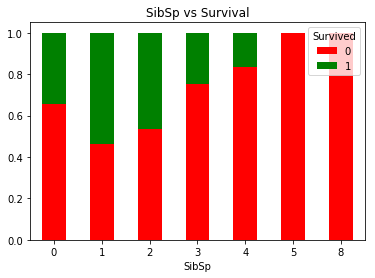

In [20]:
train.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('SibSp vs Survival')
plt.xticks(rotation=0)

- roughly, as SibSP goes up death rate increases but not a clear relationship
- large proportion of data is SibSp = 0

### Parch (continuous):
- number of parents and/or children aboard 
- like SibSp, few unique values so we can treat as categorical

In [21]:
train['Parch'].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

Text(0.5,1,'Parch vs Survival')

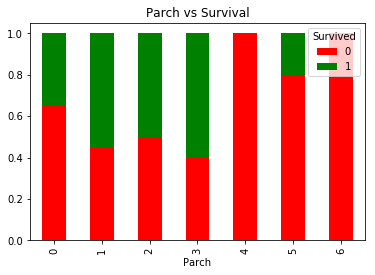

In [22]:
train.groupby('Parch')['Survived'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Parch vs Survival')

- no clear relationship, so not sure how much this will contribute to ml classifier
- large proportion of data also has Parch = 0
- **maybe both SibSp and Parch can be used for feature engineering**

### Ticket:
first glance shows not much useful information, but could possible be used for feature engineering
- ticket length, all numbers or letters/numbers

### Fare (continuous):
- mean of died = 22, mean of survived = 48 so higher fare can mean higher survival
- should have similar relationship as Pclass

In [23]:
train[train['Survived'] == 0]['Fare'].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

Text(0.5,0,'Fare')

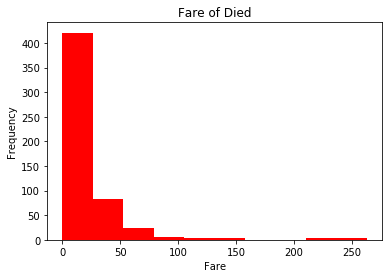

In [24]:
train[train['Survived'] == 0]['Fare'].plot(kind='hist', color='red')
plt.title('Fare of Died')
plt.xlabel('Fare')

In [25]:
train[train['Survived'] == 1]['Fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5,0,'Fare')

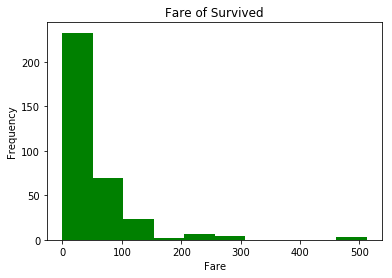

In [26]:
train[train['Survived'] == 1]['Fare'].plot(kind='hist', color='green')
plt.title('Fare of Survived')
plt.xlabel('Fare')

### Cabin:
- has many missing values about 75%
- **can extract useful info for feature engineering**
- location can be factor in survival

In [27]:
train['Cabin'].isnull().sum()

687

### Embarked:
- port where passenger got on ship

In [28]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

- S = 72%, C = 19%, Q = 9%

In [29]:
train.groupby('Embarked')['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

- C = 55% survived, 45% died
- Q = 39% survived, 61% died
- S = 34% survived, 66% died

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

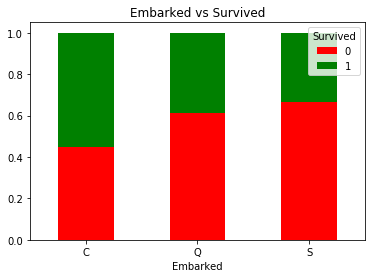

In [30]:
train.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Embarked vs Survived')
plt.xticks(rotation=0)

no clear relationship so maybe we can relate Embarked to other variables with relationship to Survived (Pclass/Fare)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

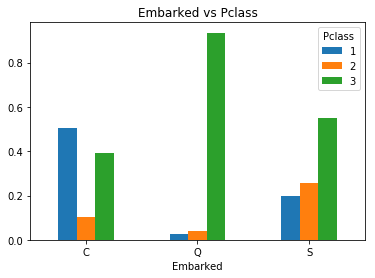

In [31]:
train.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.title('Embarked vs Pclass')
plt.xticks(rotation=0)

- most passengers from port C were 1st class
- most passengers from both Q and S were 3rd class

# 3. Data formatting:

## Filling Missing Data:

In [32]:
train['Age'].fillna(train.Age.median(), inplace=True)
train['Embarked'].fillna(train.Embarked.mode()[0], inplace=True)

In [33]:
test['Age'].fillna(test.Age.median(), inplace=True)
test['Fare'].fillna(test.Fare.median(), inplace=True)

In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Categorical to Numeric Values:

In [36]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [37]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


## Testing dropping values:

In [39]:
# train.drop(train[train.Fare == 0].index, axis=1, inplace=True)
# train.drop(train[train.Fare >= 300].index, axis=1, inplace=True)

## Feature Scaling (range 0 to 1):

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
# train[['Fare']] = scaler.fit_transform(train[['Fare']])
# train[['Age']] = scaler.fit_transform(train[['Age']])

# 4. Feature engineering:

In [74]:
age_groups = [0, 12, 25, 40, 60, 80]
groups = [1, 2, 3, 4, 5]
train['group_age'] = pd.cut(train['Age'], bins=age_groups, labels=groups)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group_age
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,3


# 5. Comparing ml models (w/ cross_val_score):

In [76]:
# all features except target (Survived)
features_ind = train.loc[:, train.columns != 'Survived'].columns.tolist()
# all numeric features (not type object)
features_num = train.select_dtypes(exclude='object').columns.tolist()
print(features_ind)
print(features_num)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'group_age']
['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'group_age']


In [77]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'group_age']
target = ['Survived']
X = train[features]
y = train[target].values.ravel()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

### Logistic Regression:

In [78]:
logreg = LogisticRegression(random_state=8, solver='liblinear')
logreg.fit(X,y)
logreg_cv = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(logreg_cv.mean())

0.792379695834752


### Gaussian Naive Bayes:

In [79]:
gnb = GaussianNB()
gnb.fit(X, y)
gnb_cv = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print(gnb_cv.mean())

0.7879599364430824


### K Nearest Neighbors:

In [80]:
knn = KNeighborsClassifier()
knn.fit(X, y)
knn_cv = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(knn_cv.mean())

0.5242739189649303


### SVC: 

In [81]:
svc = SVC(gamma='auto', random_state=8)
svc.fit(X, y)
svc_cv = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(svc_cv.mean())

0.611675746226308


### Decision Tree Classifier:

In [82]:
dt = DecisionTreeClassifier(random_state=8)
dt.fit(X, y)
dt_cv = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(dt_cv.mean())

0.7531664964249234


### Random Forest Classifier: (highest cv score)

In [83]:
rf = RandomForestClassifier(n_estimators=10, random_state=8)
rf.fit(X, y)
rf_cv = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(rf_cv.mean())

0.827211440245148


# 6. Feature selection (RFECV):

- high variability causes different number of features selected when run (w/o set random state)
  - **maybe because there is small number of features?**

In [51]:
from sklearn.feature_selection import RFECV

In [84]:
rfecv = RFECV(rf, step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=10,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [85]:
print(rfecv.n_features_)
print(rfecv.support_)
print(rfecv.ranking_)
print(rf.feature_importances_)

9
[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]
[0.18495069 0.09625377 0.25598393 0.1311056  0.04251172 0.03286403
 0.18966091 0.02657172 0.04009764]


- selected: ['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare']

# 7. Hyperparameter tuning: 4 main for RF (n_estimators, max_features, max_depth, min_samples_leaf)

In [54]:
num_est = [1, 5, 10, 20, 40, 60, 80, 100, 120, 140, 160]
max_feat = range(1, len(features))
max_depth = [1, 5, 10, 20, 40, 60, 80, 100, 120]
min_leaf = [1, 2, 5, 10, 15]

### GridSearchCV:

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

- RandomizedSearchCV reduces computational expense, searches a subset of parameters

In [56]:
# create param grid: map param names w/ param values to be searched as dictionary
param_grid = {'n_estimators': num_est,
              'max_features': max_feat,
              'max_depth': max_depth,
              'min_samples_leaf': min_leaf
             }
print(param_grid)

{'n_estimators': [1, 5, 10, 20, 40, 60, 80, 100, 120, 140, 160], 'max_features': range(1, 8), 'max_depth': [1, 5, 10, 20, 40, 60, 80, 100, 120], 'min_samples_leaf': [1, 2, 5, 10, 15]}


In [57]:
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=False, iid=True)

In [58]:
# grid.fit(X, y)

- GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=120, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_estimators': [1, 5, 10, 20, 40, 60, 80, 100, 120, 140, 160], 'max_features': range(1, 8), 'max_depth': [1, 5, 10, 20, 40, 60, 80, 100, 120], 'min_samples_leaf': [1, 2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [59]:
# grid.cv_results_ to dataframe for readability

# pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [60]:
# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)

- 0.835016835016835
{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

### Randomized Search CV (less computationally expensive):

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
param_dist = {'n_estimators': num_est,
              'max_features': max_feat,
              'max_depth': max_depth,
              'min_samples_leaf': min_leaf
             }
print(param_dist)

{'n_estimators': [1, 5, 10, 20, 40, 60, 80, 100, 120, 140, 160], 'max_features': range(1, 8), 'max_depth': [1, 5, 10, 20, 40, 60, 80, 100, 120], 'min_samples_leaf': [1, 2, 5, 10, 15]}


In [86]:
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=100, random_state=8, iid=True, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.809203,0.054240,"{'n_estimators': 1, 'min_samples_leaf': 5, 'ma..."
1,0.829405,0.037294,"{'n_estimators': 100, 'min_samples_leaf': 2, '..."
2,0.824916,0.029839,"{'n_estimators': 100, 'min_samples_leaf': 10, ..."
3,0.800224,0.033708,"{'n_estimators': 40, 'min_samples_leaf': 15, '..."
4,0.772166,0.068527,"{'n_estimators': 1, 'min_samples_leaf': 2, 'ma..."
5,0.823793,0.042867,"{'n_estimators': 120, 'min_samples_leaf': 2, '..."
6,0.814815,0.041299,"{'n_estimators': 100, 'min_samples_leaf': 10, ..."
7,0.823793,0.038605,"{'n_estimators': 160, 'min_samples_leaf': 2, '..."
8,0.785634,0.039931,"{'n_estimators': 10, 'min_samples_leaf': 15, '..."
9,0.806958,0.040097,"{'n_estimators': 5, 'min_samples_leaf': 5, 'ma..."


In [87]:
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.8327721661054994
{'n_estimators': 20, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 120}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=120, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)


In [88]:
rand_hyp = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, max_features=5, max_depth=80, random_state=8)

- tuned hyperparameters with randomizedsearchcv

In [89]:
rand_hyp.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [67]:
grid_hyp = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, max_features=6, max_depth=10, random_state=8)

- tuned hyperparameters with gridsearchcv

In [68]:
grid_hyp.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

# 8. Evaluating best model on testing set:

In [69]:
prediction = grid_hyp.predict(test[features])

In [70]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
sub = pd.DataFrame({'PassengerId': test['PassengerId'],
                    'Survived': prediction
                   })
submission = sub.to_csv('~/Python/kaggletitanic/submission4.csv', index=False)

- tuning hyperparameters improved accuracy by 4-5%
- gridsearchcv vs randomizedsearchcv improved accuracy almost 2%